# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 31 октября 2023 23:59

Мягкий дедлайн: 23:59 MSK 14 ноября 2023 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 21 ноября 2023.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [193]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [194]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

In [195]:
X_train.shape

(309, 10)

In [196]:
y_train[0:25]

array([145., 281., 129., 277., 186., 214., 245., 222., 197., 277., 270.,
        42.,  89.,  52.,  60.,  47., 257., 151., 225., 168., 248.,  53.,
        95., 200., 118.])

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Выведите  количество коэффициентов (веса, они же составляют вектор w) близких к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [197]:
from sklearn.linear_model import Ridge, Lasso

epsilon = 10**(-7)

In [198]:
def zeroes_count(alpha = 1.0):
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)

    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)
    return np.sum(abs(lasso.coef_) <= epsilon), np.sum(abs(ridge.coef_) <= epsilon)

In [199]:
z_lasso, z_ridge = zeroes_count()

print(f"Lasso zero coefs (without bias): {z_lasso}")
print(f"Ridge zero coefs (without bias): {z_ridge}")

Lasso zero coefs (without bias): 7
Ridge zero coefs (without bias): 0


In [200]:
z_lasso_list = []
z_ridge_list = []

alphas = np.logspace(-3, 3, 50)
for alpha in alphas:
    z_counter = zeroes_count(alpha)
    z_lasso_list.append(z_counter[0])
    z_ridge_list.append(z_counter[1])

In [201]:
n_features = X_train.shape[1]

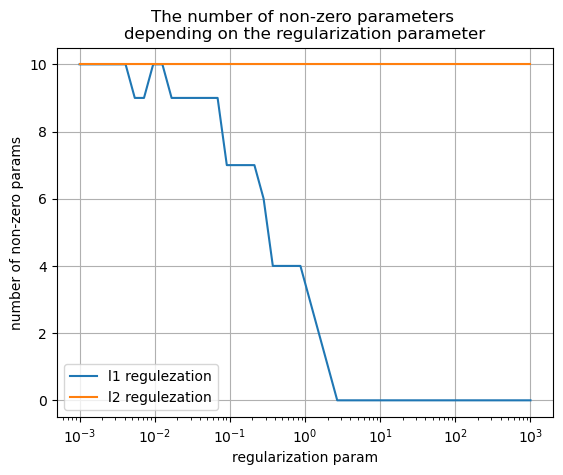

In [202]:
plt.plot(alphas, [n_features-e for e in z_lasso_list], label = 'l1 regulezation') 
plt.plot(alphas, [n_features-e for e in z_ridge_list], label = 'l2 regulezation') 

plt.xscale('log')
plt.legend()
plt.xlabel('regularization param')
plt.ylabel('number of non-zero params')
plt.title('The number of non-zero parameters \ndepending on the regularization parameter')
plt.grid(True)

plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [204]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [205]:
print('Some metrics for Ridge with default parameter (alpha = 0.1)')
print('RMSE: ', mean_squared_error(y_pred, y_test, squared = False))
print('MAE:  ', mean_absolute_error(y_pred, y_test))
print('R^2:  ', r2_score(y_test, y_pred))

Some metrics for Ridge with default parameter (alpha = 0.1)
RMSE:  58.304295113912275
MAE:   49.602750809651916
R^2:   0.359902022000946


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости трех перечисленных выше метрик от коэффициента регуляризации. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
def ridge_find_best_alpha(params, score):
    searcher = GridSearchCV(Ridge(), {'alpha': alphas}, scoring = score, cv = 10)
    searcher.fit(X_train, y_train)

    best_alpha = searcher.best_params_['alpha']
    print(score + ' best alpha = %.4f' % best_alpha)
    
    return -searcher.cv_results_['mean_test_score']
    

In [208]:
alphas = np.logspace(-3, 3, 50)

ridge_rmse_scores = ridge_find_best_alpha(alphas, 'neg_root_mean_squared_error')
ridge_mae_scores = ridge_find_best_alpha(alphas, 'neg_mean_absolute_error')
ridge_r2_scores = [-e for e in ridge_find_best_alpha(alphas, 'r2')]
ridge_scores = [ridge_rmse_scores, ridge_mae_scores, ridge_r2_scores]

neg_root_mean_squared_error best alpha = 0.0295
neg_mean_absolute_error best alpha = 0.0031
r2 best alpha = 0.0687


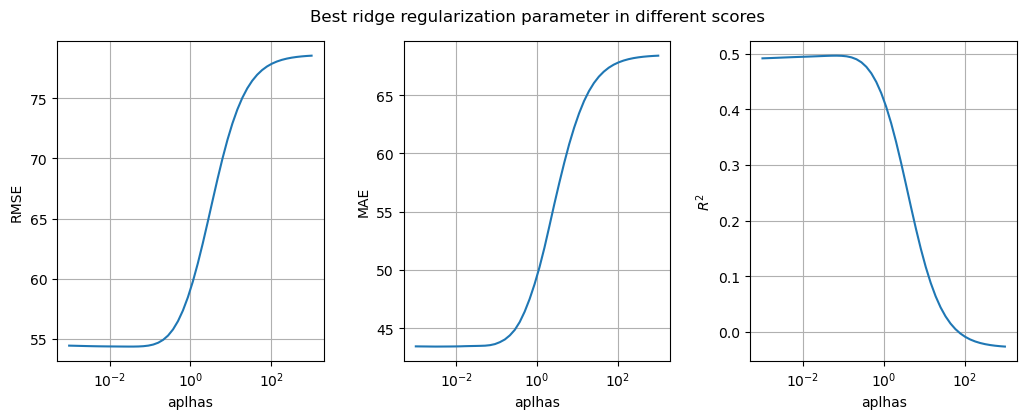

In [209]:
score_names = ['RMSE', 'MAE', '$R^2$']
figure, axis = plt.subplots(1, 3, figsize=(12, 4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.90,
                    wspace=0.3,
                    hspace=0.9)
figure.suptitle('Best ridge regularization parameter in different scores')

for i, scores in enumerate(ridge_scores):
    axis[i].plot(alphas, scores) 
    axis[i].grid(True)
    axis[i].set_xscale('log')
    axis[i].set_ylabel(score_names[i])
    axis[i].set_xlabel('aplhas')

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [210]:
from sklearn.model_selection import cross_val_predict

In [211]:
ridge = Ridge(0.0295)
y_pred = cross_val_predict(ridge, X_train, y_train, cv=10)

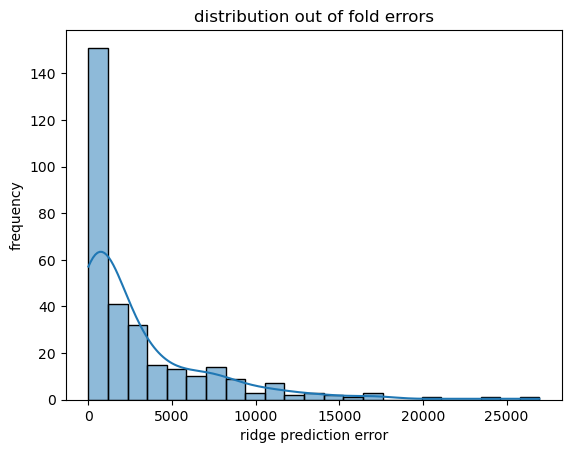

In [212]:
sns.histplot((y_train-y_pred)**2, kde=True)
plt.xlabel('ridge prediction error')
plt.ylabel('frequency')
plt.title('distribution out of fold errors')
plt.show()

Видно, что модель стремится уменьшить максимальный разброс ошибки.

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [213]:
def draw_scatters(X, y):
    figure, axis = plt.subplots(2, 5, figsize=(12, 6))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.90,
                    wspace=0.5,
                    hspace=0.3)
    
    for i in range(X.shape[1]):
        ax = axis[i//5, i%5]
        ax.set_xlim(-0.15, 0.15)
        ax.scatter(X[:, i], y)
        ax.set_ylabel('target')
        ax.set_xlabel('column ' + str(i))
    plt.show()

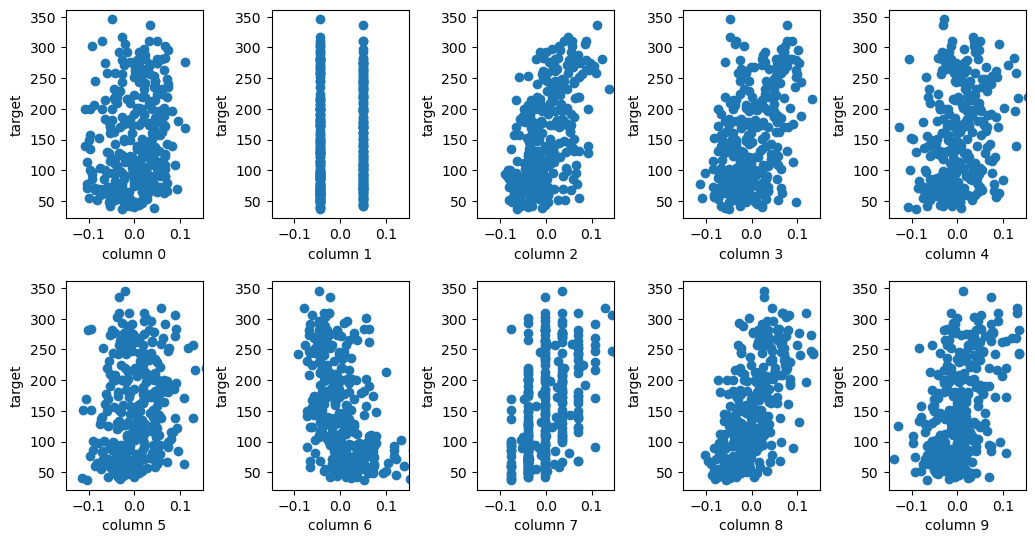

In [214]:
draw_scatters(X_train, y_train)

In [215]:
X_train_epsilon, X_valid, y_train_epsilon, y_valid = ( 
    train_test_split(X_train, y_train, train_size=0.7, random_state=241))

In [216]:
epsilons = 0.0025 * (np.arange(15) - 7)
ridge = Ridge(0.0295)
rmse_errors_after_clearing = []
for epsilon in epsilons:
    indexes = np.where(np.any(np.abs(X_train_epsilon) > 0.1+epsilon, axis = 1))[0] 
    X_train_cleared = np.delete(X_train_epsilon, indexes, axis=0)
    y_train_cleared = np.delete(y_train_epsilon, indexes)
    ridge.fit(X_train_cleared, y_train_cleared)
    y_pred = ridge.predict(X_valid)
    rmse_errors_after_clearing.append(mean_squared_error(y_pred, y_valid, squared=False))
    
print(*[str(epsilons[i]) + ' -> ' +  str(rmse_errors_after_clearing[i]) + '\n' for i in range(len(epsilons))])

-0.0175 -> 55.79894863515252
 -0.015 -> 55.10140254223157
 -0.0125 -> 54.65225985201556
 -0.01 -> 54.62133784749245
 -0.0075 -> 54.546168470817115
 -0.005 -> 54.854634029296975
 -0.0025 -> 54.795831578646045
 0.0 -> 54.43291465972633
 0.0025 -> 54.209258856007224
 0.005 -> 54.48087586634896
 0.0075 -> 54.30810213533493
 0.01 -> 54.7101050915409
 0.0125 -> 54.651840800375375
 0.015 -> 54.65936461586901
 0.0175 -> 54.451331615876924



In [217]:
min_index = rmse_errors_after_clearing.index(min(rmse_errors_after_clearing))
best_epsilon = epsilons[min_index]
best_cleared_error = rmse_errors_after_clearing[min_index]
print(f'Best train rmse error {best_cleared_error}')
print(f'Best epsilon {best_epsilon}')

Best train rmse error 54.209258856007224
Best epsilon 0.0025


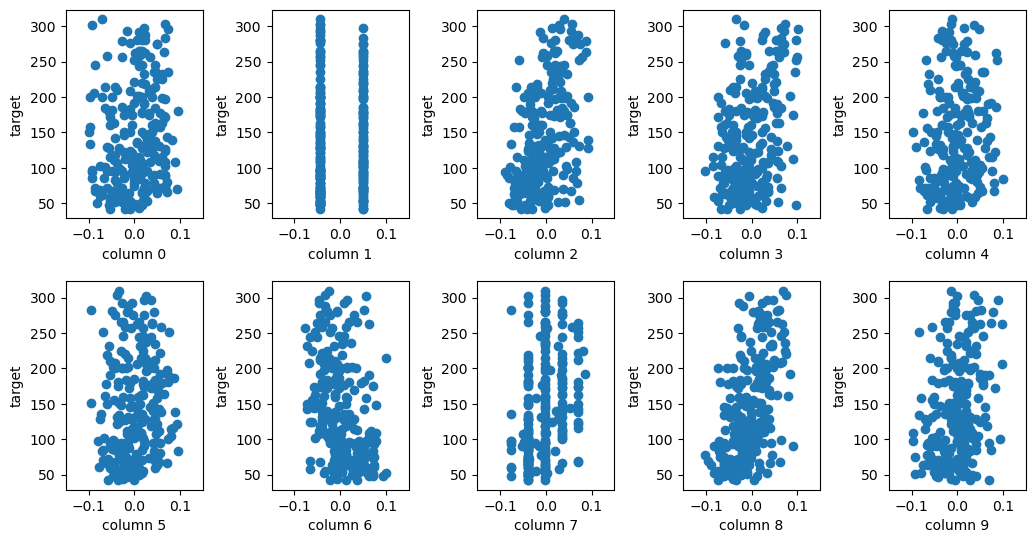

In [218]:
indexes = np.where(np.any(np.abs(X_train) > 0.1+best_epsilon, axis = 1))[0] 
X_train_cleared = np.delete(X_train, indexes, axis=0)
y_train_cleared = np.delete(y_train, indexes)
draw_scatters(X_train_cleared, y_train_cleared)

In [219]:
print(f'Was deleted {len(indexes)} raws!')

Was deleted 72 raws!


In [220]:
ridge = Ridge(0.0295)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('RMSE before clearing: ', mean_squared_error(y_pred, y_test, squared=False))

RMSE before clearing:  55.695817346180505


In [221]:
indexes = np.where(np.any(np.abs(X_train) > 0.1+best_epsilon, axis = 1))[0] 
X_train_cleared = np.delete(X_train, indexes, axis=0)
y_train_cleared = np.delete(y_train, indexes)
ridge.fit(X_train_cleared, y_train_cleared)
y_pred = ridge.predict(X_test)
print('RMSE after clearing: ', mean_squared_error(y_pred, y_test, squared=False))

RMSE after clearing:  55.26335814164684


**Ответ:** \
Стало лучше, так как ridge перестала подстраиваться под выбросы с бОльшими по модулю ошибками

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [222]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [223]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

In [224]:
svc = LinearSVC(max_iter = 1000, random_state=777)
svc.fit(X_train, y_train)
y_pred = svc.decision_function(X_test)

/Users/nikto/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [225]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

In [226]:
print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')
print(f'Pr auc score is {auc(recall, precision)}')

Roc auc score is 0.9255953313762602
Pr auc score is 0.9251976598006583


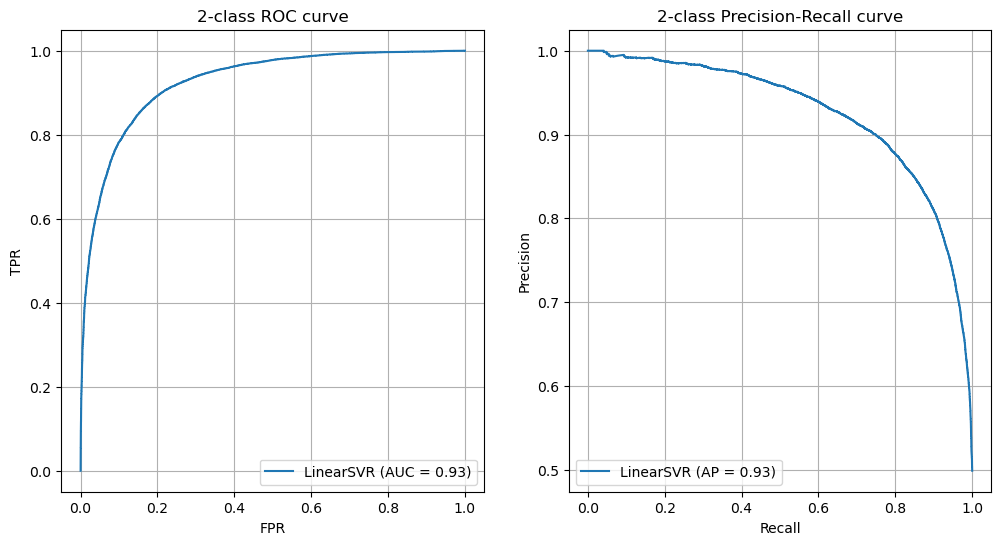

In [227]:
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

display = RocCurveDisplay.from_predictions(
    y_test, y_pred, name="LinearSVR", ax=axis[0]
)
axis[0].set_title("2-class ROC curve")
axis[0].set_xlabel('FPR')
axis[0].set_ylabel('TPR')
axis[0].grid(True)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name="LinearSVR", ax=axis[1]
)
axis[1].set_title("2-class Precision-Recall curve")
axis[1].set_xlabel('Recall')
axis[1].set_ylabel('Precision')
axis[1].grid(True)

plt.show()

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [228]:
from sklearn.svm import SVC

In [229]:
X, y = make_classification(
    n_samples=3000, n_features=2, n_informative=2 ,n_redundant=0,
    random_state=777)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777)

In [230]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

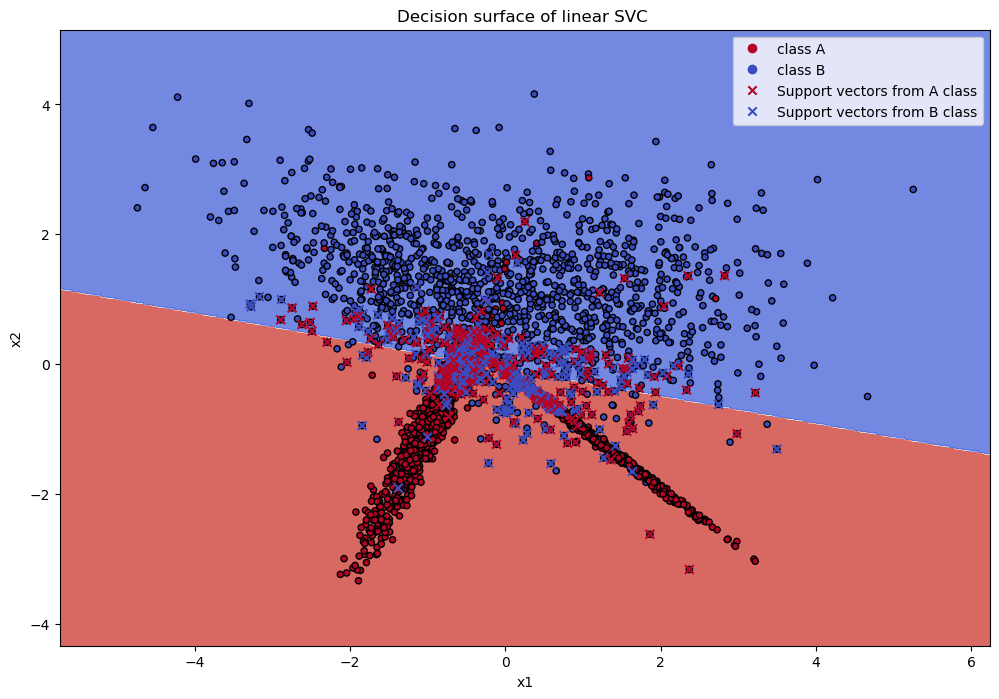

In [231]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig, ax = plt.subplots(figsize=(12,8))
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm_r, alpha=0.8)
sc1 = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm_r, s=20, edgecolors='k')

support_vectors = svc.support_vectors_
where = (X_train[:, None] == support_vectors).all(-1).any(-1)
support_vector_labels = y_train[where]
sc2 = ax.scatter(support_vectors[:,0], support_vectors[:,1], 
                 c=support_vector_labels, cmap=plt.cm.coolwarm_r, s=40, marker='x')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title(title)
plt.legend(handles= sc1.legend_elements()[0] + sc2.legend_elements()[0], 
           labels=['class A', 'class B', 'Support vectors from A class', 'Support vectors from B class'])


plt.show()

Источник кода [stackoverflow](https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python).

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [232]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append(l + (r - l) / 2)
        mask = y_test[(preds >= l) & (preds < r)]
        misk_size = np.sum((preds >= l) & (preds < r)) if np.sum((preds >= l) & (preds < r)) != 0 else 1
            
        bin_real_ratios.append(np.sum(y_test[mask] == 1) / misk_size)
    plt.plot(0.01*np.arange(100), 0.01*np.arange(100), 'r--')
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
y_proba1 = log_classifier.predict_proba(X_test)[:,1]

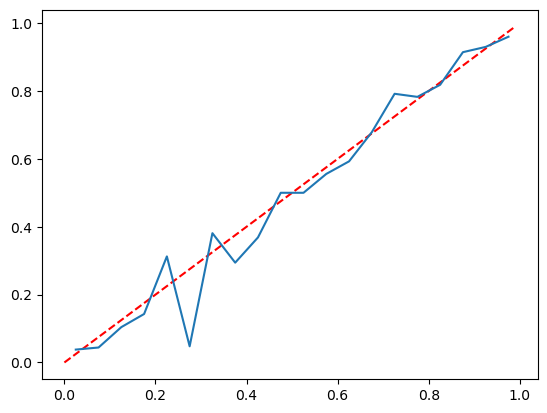

In [235]:
plot_calibration_curve(y_test, y_proba1)

In [236]:
y_proba2 = 1/(1 + np.exp(-svc.decision_function(X_test)))

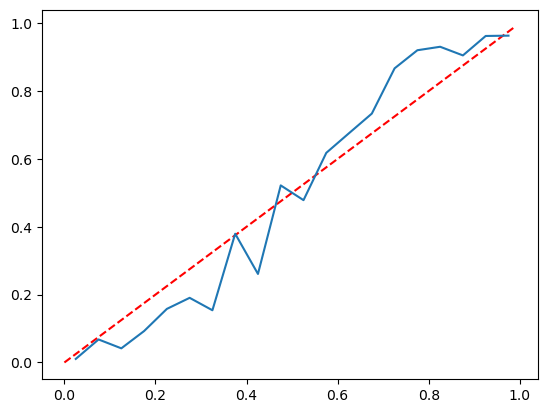

In [237]:
plot_calibration_curve(y_test, y_proba2)

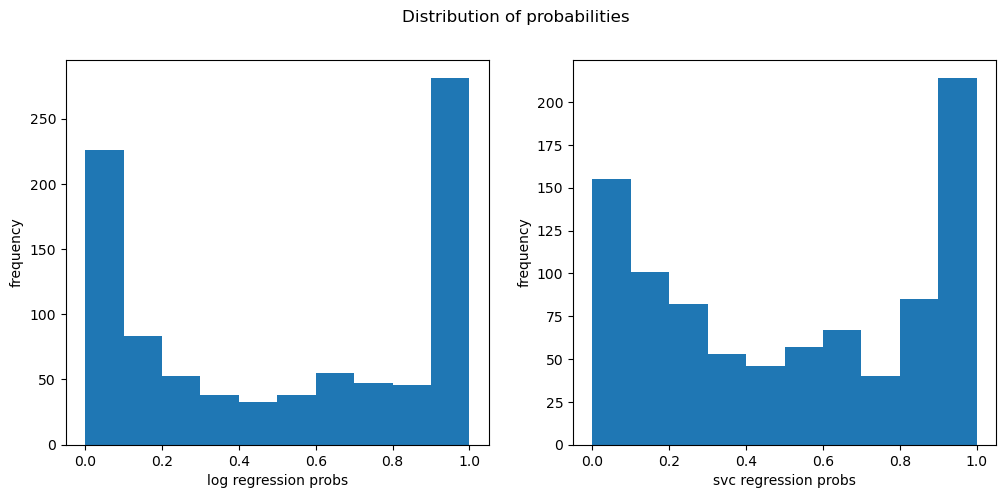

In [238]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].hist(x=y_proba1)
ax[0].set_xlabel('log regression probs')
ax[0].set_ylabel('frequency')

ax[1].hist(x=y_proba2)
ax[1].set_xlabel('svc regression probs')
ax[1].set_ylabel('frequency')

fig.suptitle('Distribution of probabilities')

plt.show()

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [239]:
from sklearn.calibration import CalibratedClassifierCV

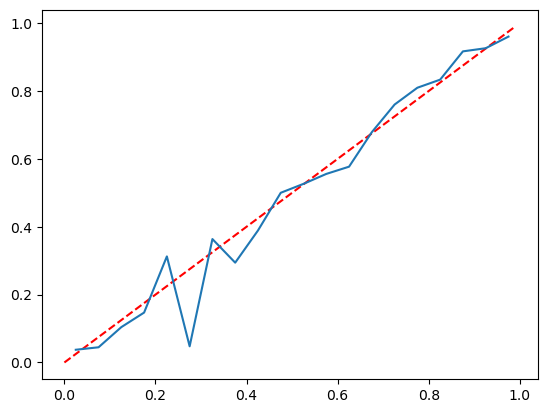

In [240]:
calibrated_svc = CalibratedClassifierCV(svc, cv='prefit')
calibrated_svc.fit(X_train, y_train)
y_calibrated_proba2 = calibrated_svc.predict_proba(X_test)[:, 1]
plot_calibration_curve(y_test, y_calibrated_proba2)

Кривая стала "глаже", что свидетельствует об улучшении точности рпедсказаний.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

Реализуем "наивную калибровку" (?):
- По сетке найдем лучшее значение порога
- Теперь центрируем вероятности по этому порогу, чтобы $t_{best}'$ = 0.5: (понадеемся, что это перераспределит вероятности более равномерным образом)\
Найдем преобразование $\hat t(t) = \alpha t^2 + \beta t + \gamma$ (квадратичная функция выбрана, так как необходимо зафиксировать 3 точки)\
Потребуем: 
- $\hat t(0) = 0 \Rightarrow \gamma = 0$
- $\hat t(1) = 1 \Rightarrow \alpha + \beta = 1$ 

- $\hat t(t_{best}) = \alpha t_{best}^2 + \beta t_{best} = \frac{1}{2}$
-  $\Rightarrow \{wolfram Alpha\}  \Rightarrow \alpha = \frac{1-2t_{best}}{2(t_{best}-1)t_{best}}, \beta = \frac{2t_{best}^2 - 1}{2(t_{best}-1)t_{best}} $
Таким образом преобразование вероятностей имеет вид: \
$\hat{t}(t) = \frac{1-2t_{best}}{2(t_{best}-1)t_{best}} t^2 + \frac{2t_{best}^2 - 1}{2(t_{best}-1)t_{best}} t$

Optimal threshold: 0.6152631578947368


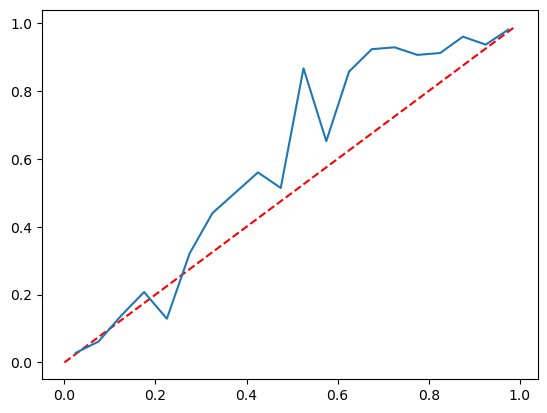

In [241]:
roc_scores = []
params = np.linspace(0.1,0.99,20)
for t in params:
    y_pred = (y_proba2 >= t).astype(int)
    roc_scores.append(roc_auc_score(y_pred, y_test))

best_threshold = params[roc_scores.index(max(roc_scores))]
print('Optimal threshold:', best_threshold)

y_calibrated_proba2 = ((1-2*best_threshold)/(2*(best_threshold-1)*best_threshold) * (y_proba2**2) +
                       (2*best_threshold**2 - 1)/(2*(best_threshold-1)*best_threshold) * y_proba2)
                        
plot_calibration_curve(y_test, y_calibrated_proba2)

Надежды не оправдались :/

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [242]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [243]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [244]:
log_regression = LogisticRegression(solver = 'liblinear')
log_regression.fit(X_train, y_train)
y_pred = log_regression.predict_proba(X_test)[:,1]

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

In [245]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')
print(f'Pr auc score is {auc(recall, precision)}')

Roc auc score is 0.6250596146008585
Pr auc score is 0.6128321169211115


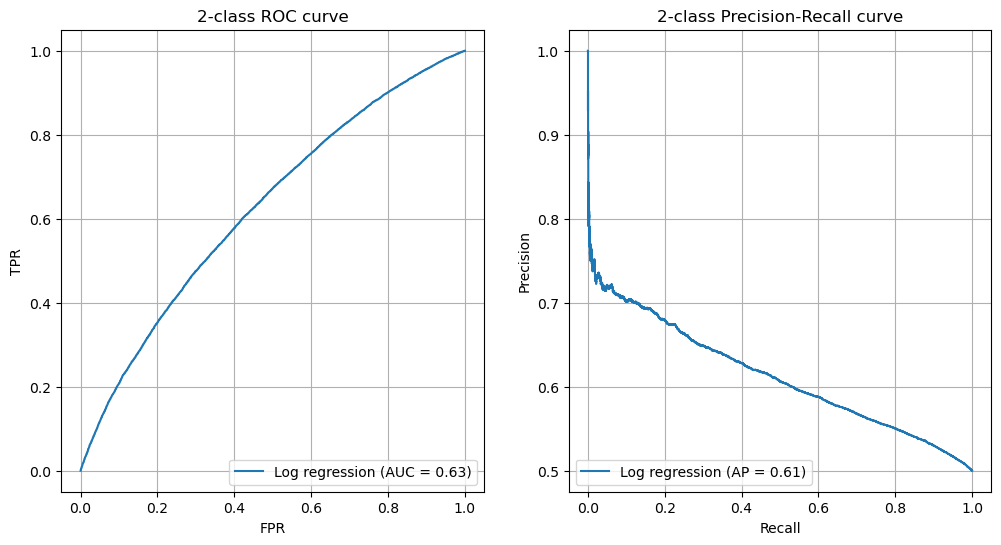

In [246]:
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

display = RocCurveDisplay.from_predictions(
    y_test, y_pred, name='Log regression', ax=axis[0]
)
axis[0].set_title('2-class ROC curve')
axis[0].set_xlabel('FPR')
axis[0].set_ylabel('TPR')
axis[0].grid(True)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name='Log regression', ax=axis[1]
)
axis[1].set_title('2-class Precision-Recall curve')
axis[1].set_xlabel('Recall')
axis[1].set_ylabel('Precision')
axis[1].grid(True)

plt.show()

**Ответ:** \
По графикам и значениям метрик можно судить, что полученный классификатор "плохо" классифицирует объекты.

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [247]:
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier

In [248]:
alphas = np.logspace(-3, 0, 4)
batch = 1000

alpha_losses = []
for alpha in alphas:
    clf = SGDClassifier(warm_start = True, loss = 'log_loss', alpha = alpha)
    print(alpha)
    train_losses = []
    test_losses = []
    for i in range(X_train.shape[0] // batch):
        clf.partial_fit(X_train.values[i*batch:(i+1)*batch], y_train[i*batch:(i+1)*batch], 
                        classes=np.unique(y_train))
        p_train = clf.predict_proba(X_train.values)[:,1]
        p_test = clf.predict_proba(X_test.values)[:,1]
        train_losses.append(log_loss(y_train, p_train))
        test_losses.append(log_loss(y_test, p_test))
    alpha_losses.append((train_losses, test_losses))

0.001
0.01
0.1
1.0


In [249]:
dfs = []
for i, alpha in enumerate(alphas):
    df = pd.DataFrame()
    df['loss'] = alpha_losses[i][0]
    df['data'] = 'train'
    dfs.append(df)
    df = pd.DataFrame()
    df['loss'] = alpha_losses[i][1]
    df['data'] = 'test'
    dfs.append(df)

df = pd.concat(dfs, keys = np.repeat(alphas, 2)).reset_index().rename({'level_0': 'alpha', 'level_1':'n_batch'}, axis=1)

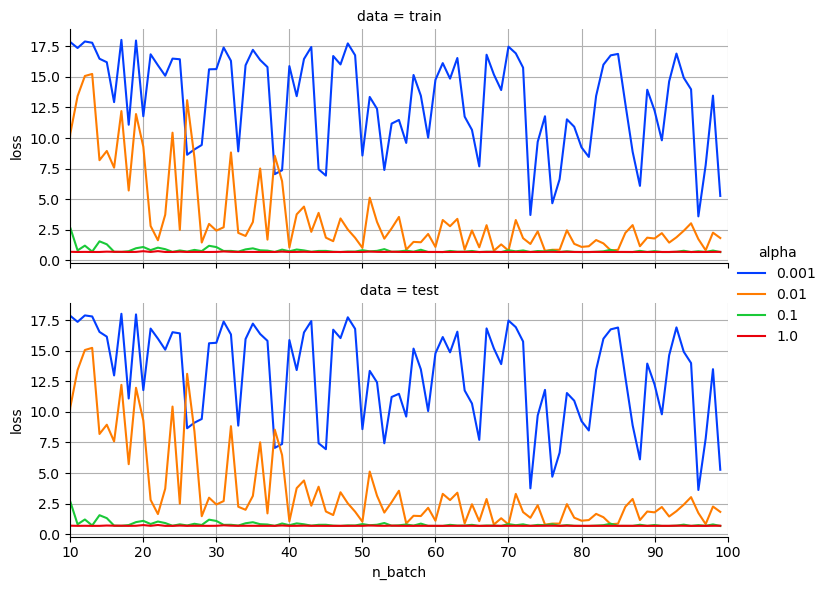

In [250]:
grid = sns.relplot(data = df, x = 'n_batch', y = 'loss', hue = 'alpha', 
            kind = 'line', palette='bright', row = 'data', aspect=2.5, height=3)

grid.axes[0][0].grid(True)
grid.axes[1][0].grid(True)
grid.axes[0][0].set_xlim(10, 100)
grid.axes[1][0].set_xlim(10, 100)


plt.show()

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [251]:
%%time
log_regression = LogisticRegression(solver = 'liblinear')
log_regression.fit(X_train, y_train)
y_pred = log_regression.predict_proba(X_test)[:,1]

print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')

Roc auc score is 0.6250596146008585
CPU times: user 4.58 s, sys: 86.3 ms, total: 4.66 s
Wall time: 4.75 s


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [252]:
from sklearn.preprocessing import OneHotEncoder

In [253]:
categorical = []
for column_name in X_train.columns:
    if column_name.find('cat') != -1:
        categorical.append(column_name)
X_train[categorical]

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
id,,,,,,,,,,,,,,
1049183,1,0,0,6,1,-1,0,0,1,1,1,0,1,91
106872,1,1,0,11,1,-1,0,-1,4,1,1,2,1,104
28943,2,1,0,10,0,-1,0,1,11,1,1,0,1,44
851826,1,1,0,5,1,0,2,1,1,1,1,2,1,1
934813,1,0,4,9,1,0,0,0,7,1,1,1,1,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624097,1,0,0,5,0,0,1,0,14,1,1,2,1,104
697975,2,1,0,11,0,1,0,1,10,1,1,2,1,28
723907,1,1,0,11,0,-1,0,-1,0,1,1,1,1,23


In [254]:
X_train_ohe = pd.get_dummies(data = X_train, columns = categorical)
X_test_ohe = pd.get_dummies(data = X_test, columns = categorical)

In [255]:
%%time

log_regression.fit(X_train_ohe, y_train)
y_pred = log_regression.predict_proba(X_test_ohe)[:,1]

print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')

Roc auc score is 0.6329295531141856
CPU times: user 6.42 s, sys: 249 ms, total: 6.67 s
Wall time: 6.74 s


In [256]:
X_train_ohe.shape

(100000, 226)

Улучшение качества с 0.6251 до 0.6329, при увеличении времени обучения и предсказания с 4.38 до 4.46 + 212 новых признаков!

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [257]:
class MeanTransformer():
    
    def __init__(self, smooth = False, seed = 777):
        self.means = {}
        self.smooth = smooth
        np.random.seed(seed)
        
    def fit(self, X, y):
        global_mean = 0
        if self.smooth:
            global_mean = np.mean(y)
        for column_name in X.columns:
            col = X[column_name]
            labels = np.unique(col)
            self.means[column_name] = {}
            for label in labels:
                eps = np.random.normal(0, 0.01)
                mask = (col == label)
                mean = ((y[mask].sum() + 10*global_mean) / (mask.sum()+10*self.smooth)) + eps
                self.means[column_name][label] = mean
        
    def fit_transform(self, X, y):
        X_proc = X.copy()
        for column_name in X.columns:
            if column_name.find('cat') == -1:
                continue 
            col = X[column_name]
            labels = np.unique(col)
            self.means[column_name] = {}
            for label in labels:
                mask = (col == label)
                v = y[mask]
                *v,lst = np.insert(v, 0, 0).cumsum()
                eps = np.random.normal(0, 0.01, len(v))
                v = v / np.insert(1 + np.arange(len(v)-1),0,1) + eps
                X_proc.loc[mask,column_name] = v
                
                eps = np.random.normal(0, 0.01)
                mean = lst / len(v) + eps
                self.means[column_name][label] = mean 

        return X_proc
                    
    def transform(self, X):
        X_proc = X.copy()
        for key1 in self.means:
            X_proc[key1] = X_proc[key1].map(self.means[key1])
        return X_proc

In [258]:
transformer = MeanTransformer()
transformer.fit(X_train[categorical], y_train)

In [259]:
X_train_proc = transformer.transform(X_train)
X_test_proc = transformer.transform(X_test)
X_test_proc[categorical]

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
id,,,,,,,,,,,,,,
1050571,0.507979,0.494773,0.489398,0.438821,0.489285,0.473431,0.485401,0.470049,0.468233,0.484861,0.476929,0.510174,0.500224,0.387568
134934,0.498703,0.503571,0.489398,0.523792,0.489285,0.515614,0.571999,0.517178,0.576208,0.484861,0.476929,0.510174,0.500224,0.561161
630943,0.507979,0.494773,0.489398,0.533453,0.489285,0.473431,0.571999,0.470049,0.493865,0.484861,0.476929,0.510174,0.500224,0.561161
48209,0.498703,0.494773,0.489398,0.441578,0.489285,0.473431,0.571999,0.509214,0.544020,0.484861,0.476929,0.480396,0.500224,0.561161
867010,0.487196,0.494773,0.489398,0.438821,0.489285,0.473431,0.485401,0.470049,0.468233,0.484861,0.476929,0.510174,0.500224,0.387568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76257,0.487196,0.494773,0.489398,0.438821,0.489285,0.572792,0.485401,0.517178,0.479320,0.484861,0.542823,0.510174,0.500224,0.498630
1473124,0.498703,0.494773,0.489398,0.438821,0.582127,0.515614,0.485401,0.509214,0.594350,0.484861,0.476929,0.591755,0.500224,0.561161
1463549,0.487196,0.494773,0.489398,0.533453,0.489285,0.572792,0.485401,0.517178,0.479320,0.484861,0.476929,0.510174,0.500224,0.522266


In [260]:
%%time

log_regression.fit(X_train_proc, y_train)
y_pred_test = log_regression.predict_proba(X_test_proc)[:, 1]

print(f'Test roc auc score is {roc_auc_score(y_test, y_pred_test)}')

Test roc auc score is 0.6286321010523023
CPU times: user 5.7 s, sys: 88.5 ms, total: 5.79 s
Wall time: 5.8 s


Улучшение качества с 0.6251 до 0.6286 (против ohe 0.6329), при этом времени обучения и предсказания увеличилось с 4.5c до 6.02с (против ohe 7.14c) и не добавлено ни одного нового признака.
Остается решить, что важнее время или качество. При таком относительно небольшом количестве новых признаков для данной задачи я бы выбрал ohe.

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум).

__(+0.5 балла)__

In [261]:
transformer = MeanTransformer()
X_train_proc = transformer.fit_transform(X_train, y_train)
X_test_proc = transformer.transform(X_test)
X_test_proc[categorical]

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
id,,,,,,,,,,,,,,
1050571,0.515113,0.480652,0.475782,0.430291,0.488110,0.477195,0.478104,0.470348,0.458964,0.508456,0.475289,0.515207,0.493219,0.389898
134934,0.493018,0.521365,0.475782,0.523058,0.488110,0.507932,0.593676,0.520967,0.561168,0.508456,0.475289,0.515207,0.493219,0.546708
630943,0.515113,0.480652,0.475782,0.521899,0.488110,0.477195,0.593676,0.470348,0.527529,0.508456,0.475289,0.515207,0.493219,0.546708
48209,0.493018,0.480652,0.475782,0.460217,0.488110,0.477195,0.593676,0.535394,0.533968,0.508456,0.475289,0.471840,0.493219,0.546708
867010,0.490822,0.480652,0.475782,0.430291,0.488110,0.477195,0.478104,0.470348,0.458964,0.508456,0.475289,0.515207,0.493219,0.389898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76257,0.490822,0.480652,0.475782,0.430291,0.488110,0.570353,0.478104,0.520967,0.488440,0.508456,0.556215,0.515207,0.493219,0.471463
1473124,0.493018,0.480652,0.475782,0.430291,0.567645,0.507932,0.478104,0.535394,0.588809,0.508456,0.475289,0.602546,0.493219,0.546708
1463549,0.490822,0.480652,0.475782,0.521899,0.488110,0.570353,0.478104,0.520967,0.488440,0.508456,0.475289,0.515207,0.493219,0.523370


In [262]:
%%time

log_regression.fit(X_train_proc, y_train)
y_pred_test = log_regression.predict_proba(X_test_proc)[:, 1]

print(f'Test roc auc score is {roc_auc_score(y_test, y_pred_test)}')

Test roc auc score is 0.6287199886535679
CPU times: user 5.48 s, sys: 81.1 ms, total: 5.56 s
Wall time: 5.58 s


В сравнении с первым вариантом получили небольшой прирост в качестве с 0.6286 до 0.6287 и похожее время работы 6.02с и 5.8с \
То есть оба метода дают +- одинаковый результат в приложении к данной задаче.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке.

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [263]:
transformer = MeanTransformer(True)
transformer.fit(X_train[categorical], y_train)

In [264]:
X_train_proc = transformer.transform(X_train)
X_test_proc = transformer.transform(X_test)
X_test_proc[categorical]

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
id,,,,,,,,,,,,,,
1050571,0.507975,0.494775,0.489401,0.438844,0.489288,0.473435,0.485404,0.470057,0.468250,0.484862,0.476931,0.510174,0.500224,0.388166
134934,0.498691,0.503567,0.489401,0.523730,0.489288,0.515599,0.571860,0.517169,0.575467,0.484862,0.476931,0.510174,0.500224,0.561128
630943,0.507975,0.494775,0.489401,0.533443,0.489288,0.473435,0.571860,0.470057,0.493815,0.484862,0.476931,0.510174,0.500224,0.561128
48209,0.498691,0.494775,0.489401,0.441635,0.489288,0.473435,0.571860,0.509207,0.543843,0.484862,0.476931,0.480404,0.500224,0.561128
867010,0.487197,0.494775,0.489401,0.438844,0.489288,0.473435,0.485404,0.470057,0.468250,0.484862,0.476931,0.510174,0.500224,0.388166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76257,0.487197,0.494775,0.489401,0.438844,0.489288,0.572760,0.485404,0.517169,0.479328,0.484862,0.542795,0.510174,0.500224,0.498756
1473124,0.498691,0.494775,0.489401,0.438844,0.582085,0.515599,0.485404,0.509207,0.594144,0.484862,0.476931,0.591584,0.500224,0.561128
1463549,0.487197,0.494775,0.489401,0.533443,0.489288,0.572760,0.485404,0.517169,0.479328,0.484862,0.476931,0.510174,0.500224,0.521993


In [265]:
%%time

log_regression.fit(X_train_proc, y_train)
y_pred_test = log_regression.predict_proba(X_test_proc)[:, 1]

print(f'Test roc auc score is {roc_auc_score(y_test, y_pred_test)}')

Test roc auc score is 0.628660140252706
CPU times: user 6.25 s, sys: 75 ms, total: 6.33 s
Wall time: 6.35 s


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ:** \
"+": 
- не раздувается признаковое пространство
- признаки более информативны, так как содержат некоторую информацию о целевой переменной
- меньшее время обучения из-за 1 пункта
  
"-": 
- существует риск переобучения из-за утечки целевой перемнной в данные
- по-хорошему шумы стоит подбирать под каждый класс отдельно, потому что для каждого класса порядок среднего значения может быть различен - есть вероятность слишком или недостаточно зашумить данные

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [266]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [267]:
X_train_ohe = pd.get_dummies(data = X_train, columns = categorical)
X_test_ohe = pd.get_dummies(data = X_test, columns = categorical)

In [268]:
print(f'Новое число признаков: {X_train_ohe.shape[1]}')

Новое число признаков: 227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [269]:
%%time

log_regression.fit(X_train_ohe, y_train)
y_pred = log_regression.predict_proba(X_test_ohe)[:,1]

print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')

Roc auc score is 0.6380712363599864
CPU times: user 13.3 s, sys: 1.05 s, total: 14.3 s
Wall time: 14.8 s


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [270]:
coefs = log_regression.coef_[0]
ind = np.argsort(np.abs(log_regression.coef_))[0][::-1][0:200]
ind

array([ 19,  20,  52,  49, 185,  50, 109, 163,  51, 217, 172,  75, 143,
        82, 112, 140,  43,  74,  85, 188,  46,  67, 210, 113,  87, 165,
       145,  48, 148,   2, 121,  73,  55, 155, 115,  44, 219,  54,  89,
        13,  53, 123,   5,  59, 161,  90,  80, 111, 120, 208,  97,  47,
        57, 152, 103,  65, 117,  81,  61, 129,  76,  86,  95,  71, 130,
       215,  84,  96, 127, 124,  45,  79, 187, 139,  62, 138, 184, 137,
       174,  88, 153, 118,  83, 178, 122,  66, 224,  15, 142, 207,  98,
       167, 146, 108,  94,  93, 218, 171, 193, 202,  77, 134, 223, 195,
        17,  70, 203, 102,   7,  12,  60,  68, 176,  63, 169, 190, 166,
        14, 168, 222,  56, 170, 126,  99, 149,  16, 105, 220, 221, 179,
         4, 194, 216, 206, 204, 133, 132,  22,   9, 186, 214, 135, 213,
       147, 151, 131,  92, 201, 205,  10, 211, 107, 200,   3, 196, 101,
       162, 173, 183, 125, 189,   6,  25,  58, 144, 181,  69,   8, 128,
        78, 119,  11, 160, 141,  72, 175, 180,  64,   1,  21, 13

In [271]:
selected_columns = X_train_ohe.columns[ind]
selected_columns

Index(['ps_car_12', 'ps_car_13', 'ps_ind_05_cat_0', 'ps_ind_04_cat_0',
       'ps_car_11_cat_63', 'ps_ind_04_cat_1', 'ps_car_07_cat_-1',
       'ps_car_11_cat_41', 'ps_ind_05_cat_-1', 'ps_car_11_cat_95',
       ...
       'ps_car_11_cat_42', 'ps_car_11_cat_35', 'ps_car_11_cat_34',
       'ps_calc_02', 'ps_car_11_cat_28', 'ps_car_11_cat_76',
       'ps_car_11_cat_69', 'ps_car_11_cat_90', 'ps_ind_01',
       'ps_car_06_cat_15'],
      dtype='object', length=200)

In [272]:
%%time

log_regression.fit(X_train_ohe[selected_columns], y_train)
y_pred = log_regression.predict_proba(X_test_ohe[selected_columns])[:,1]

print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')

Roc auc score is 0.6383076550535629
CPU times: user 9.55 s, sys: 972 ms, total: 10.5 s
Wall time: 11.3 s


Качество поднялось с 0.6381 до 0.6383

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

Далее будем работать только с отмасштабируемыми признаками.

In [273]:
from sklearn.preprocessing import StandardScaler

In [274]:
numeric = []
for column_name in X_train.columns:
    if not (column_name.find('cat') != -1 or column_name.find('bin') != -1):
        numeric.append(column_name)
numeric

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [275]:
X_train_ohe_standarted = X_train_ohe.copy()
X_test_ohe_standarted = X_test_ohe.copy()

In [276]:
standart_scaler = StandardScaler().fit(X_train_ohe[numeric])
X_train_ohe_standarted[numeric] = standart_scaler.transform(X_train_ohe[numeric])
X_test_ohe_standarted[numeric] = standart_scaler.transform(X_test_ohe[numeric])

In [277]:
X_train_ohe_standarted[numeric].mean()

ps_ind_01     5.730075e-17
ps_ind_03    -3.881231e-17
ps_ind_14    -2.604647e-17
ps_ind_15     1.175710e-16
ps_reg_01     8.416048e-16
ps_reg_02    -1.853321e-17
ps_reg_03     2.332767e-16
ps_car_11    -1.970459e-16
ps_car_12    -1.601153e-15
ps_car_13    -6.118944e-16
ps_car_14    -1.341121e-17
ps_car_15    -3.920177e-16
ps_calc_01    1.389842e-16
ps_calc_02    1.539062e-16
ps_calc_03    7.117828e-18
ps_calc_04   -1.184327e-16
ps_calc_05   -5.452525e-17
ps_calc_06    1.381261e-16
ps_calc_07    8.462306e-17
ps_calc_08   -4.120730e-16
ps_calc_09    1.023654e-17
ps_calc_10    1.235995e-16
ps_calc_11   -1.717530e-16
ps_calc_12   -3.373880e-17
ps_calc_13   -1.757074e-17
ps_calc_14    3.661876e-17
dtype: float64

In [278]:
X_train_ohe_standarted.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
id,,,,,,,,,,,,,,,,,,,,,
381341,-0.453891,1.323462,0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1327969,0.050218,-0.897562,0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
601794,-0.958001,-0.897562,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
632925,2.066657,2.433973,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
74864,0.554328,0.212950,0,0,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [279]:
X_test_ohe_standarted.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
id,,,,,,,,,,,,,,,,,,,,,
1149576,1.058438,-1.637903,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1022505,-0.958001,0.212950,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
451220,-0.958001,0.212950,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
387700,1.058438,1.693632,0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
835896,-0.958001,-1.267733,0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [280]:
%%time

log_regression.fit(X_train_ohe_standarted, y_train)
y_pred = log_regression.predict_proba(X_test_ohe_standarted)[:,1]

print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')

Roc auc score is 0.6381235871357551
CPU times: user 16.6 s, sys: 1.12 s, total: 17.7 s
Wall time: 18.3 s


In [281]:
coefs = log_regression.coef_[0]
ind = np.argsort(np.abs(log_regression.coef_))[0][::-1][0:200]
selected_columns = X_train_ohe_standarted.columns[ind]
selected_columns

Index(['ps_ind_05_cat_0', 'ps_car_11_cat_63', 'ps_ind_04_cat_0',
       'ps_car_11_cat_41', 'ps_ind_05_cat_-1', 'ps_ind_04_cat_-1',
       'ps_ind_04_cat_1', 'ps_car_04_cat_7', 'ps_car_04_cat_4',
       'ps_car_11_cat_95',
       ...
       'ps_car_11_cat_6', 'ps_calc_03', 'ps_calc_08', 'ps_car_11_cat_14',
       'ps_car_14', 'ps_ind_14', 'ps_calc_12', 'ps_car_06_cat_10',
       'ps_calc_01', 'ps_car_11_cat_69'],
      dtype='object', length=200)

In [282]:
%%time

log_regression.fit(X_train_ohe_standarted[selected_columns], y_train)
y_pred = log_regression.predict_proba(X_test_ohe_standarted[selected_columns])[:,1]

print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')

Roc auc score is 0.638275781821042
CPU times: user 6.3 s, sys: 863 ms, total: 7.16 s
Wall time: 7.57 s


После масштабирования численных признаков с использованием ohe качество на тесте поднялось с 0.63808 до 0.63812 \
При это после отбора 200 больших по модулю коэффициентов качество поднялось на 0.00015

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [283]:
%%time
y_pos_mask = y_train == 1
y_neg_mask = y_train == 0

x_pos = X_train_ohe[y_pos_mask]
x_neg =  X_train_ohe[y_neg_mask]

mean_pos = x_pos.mean()
mean_neg = x_neg.mean()

std_pos = np.var(x_pos)
std_neg = np.var(x_neg)

n_pos = y_pos_mask.sum()
n_neg = y_neg_mask.sum()
t = np.abs(mean_pos-mean_neg) / np.sqrt((n_pos*std_pos + n_neg*std_neg)/(n_pos+n_neg))
selected_columns = t[np.argpartition(t.values, -200)[-200:]].index

CPU times: user 565 ms, sys: 420 ms, total: 985 ms
Wall time: 1.1 s


In [284]:
%%time

log_regression.fit(X_train_ohe_standarted[selected_columns], y_train)
y_pred = log_regression.predict_proba(X_test_ohe_standarted[selected_columns])[:,1]

print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')

Roc auc score is 0.6386408009386674
CPU times: user 7.75 s, sys: 913 ms, total: 8.66 s
Wall time: 9.11 s


До отбора качество на трейне 0.63808, после - 0.63864 $\Rightarrow$ улучшение (даже по сравнению с масштабированным отбором двухсот больших по модулю коэффициентов). \
Скорость вместо 16.9 секунд изменилась на 1.28 (отбор признаков) + 9.37 (обучение + предсказание). $\Rightarrow$ улучшение.

### Методы-обёртки

__Задание 10.__

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [285]:
X_train_ohe_train, X_train_ohe_valid, y_train_train , y_train_valid = (
                        train_test_split(X_train_ohe_standarted, y_train, test_size=0.98))

print(f'Обучаться будем на {X_train_ohe_train.shape[0]} объектах.')
print(f'Замерять качество будем на {X_train_ohe_valid.shape[0]} объектах.')

Обучаться будем на 9523 объектах.
Замерять качество будем на 466646 объектах.


In [286]:
%%time
losses = []
all_columns = np.array(X_train_ohe_train.columns)
for column in tqdm(X_train_ohe_train.columns):    
    selected_columns = np.delete(all_columns, np.where(all_columns == column))

    log_regression.fit(X_train_ohe_train[selected_columns], y_train_train)
    y_pred = log_regression.predict_proba(X_train_ohe_valid[selected_columns])[:,1]

    losses.append(roc_auc_score(y_train_valid, y_pred))

100%|██████████████████████████████████| 227/227 [38:05<00:00, 10.07s/it]

CPU times: user 2min 15s, sys: 1min 43s, total: 3min 59s
Wall time: 38min 5s


In [287]:
selected_columns = all_columns[np.argsort(losses)[:200]]
len(selected_columns)

200

In [288]:
%%time

log_regression.fit(X_train_ohe_standarted[selected_columns], y_train)
y_pred = log_regression.predict_proba(X_test_ohe_standarted[selected_columns])[:,1]

print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')

Roc auc score is 0.6384071761961695
CPU times: user 13.5 s, sys: 1.15 s, total: 14.6 s
Wall time: 17min 11s


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:**
Было изучены 3 основных метода. Приведем для каждого качество метрики на тестовой выборке при условии прдварительной предобработки данных с помощью ohe и standart scaling.
- Качество без отбора признаков: 0.638124 (15.1s)
- Отбрасывание признаков с меньшими по моудлю весами: 0.638275 (eps s + 8.77 s)
- Метод фильтрации: 0.638641 (1.28s + 9.37s)
- Метод обертки: 0.6384072 (4min 59s + 13.8s)

Отбрасывание по модулям коффициентов:
- Быстро, просто и понятно.

  
Фильтрация:
- Достаточно быстро. Показало наилучший результат в данной задаче.


Жадный перебор:
- Долго, но идейно понятный механизм жадного отбора, который почти наверное не должен подводить

 
Итого: в данной задаче все методы показали улучшение в качестве, но при разных временных затратах.


## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку.

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты.

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000.

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [289]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [290]:
print(f'Доля положительных объектов {np.sum(y_train == 1) / len(y_train):.5f}')

Доля положительных объектов 0.03648


Потому что из-за этого и существуют страховые комании, иначе бы они не окупались или ставили более невыгодные для людей условия.

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [291]:
X_train_ohe = pd.get_dummies(data = X_train, columns = categorical)
X_test_ohe = pd.get_dummies(data = X_test, columns = categorical)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [292]:
%%time

log_regression.fit(X_train_ohe, y_train)
y_pred = log_regression.predict_proba(X_test_ohe)[:,1]
y_pred

CPU times: user 13.2 s, sys: 1.16 s, total: 14.3 s
Wall time: 7min 36s


array([0.15296597, 0.04041778, 0.03569644, ..., 0.03280943, 0.03414681,
       0.02634915])

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [293]:
print(f'Roc auc score is {roc_auc_score(y_test, y_pred)}')

Roc auc score is 0.6380712363599864


Значение Roc auc близко к 0.5, что говорит о слабой предсказательной способности модели. \
Возможно, это связано с тем что данная выборка линейно неразделима, а мы строим линейны классификатор.

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

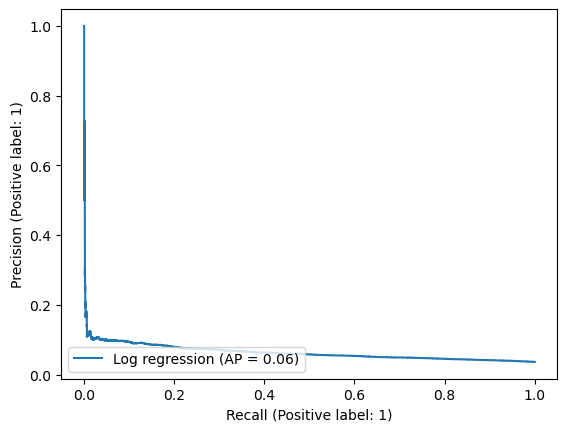

In [294]:
display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name='Log regression'
)
plt.show()

Низкий показатель AP и резкое падение графика говорят о некачественности классификатора. Резкое падение связано с тем, что меткам раным -1 классификатор дает высокие вероятности (движение вниз происходит при отсортированных по невозрастанию вероятностях и в случае равенства метки "-1")

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [295]:
log_regression.fit(X_train_ohe, y_train)
y_pred_train = log_regression.predict_proba(X_train_ohe)[:,1]
y_pred_test = log_regression.predict_proba(X_test_ohe)[:,1]

In [296]:
params = np.linspace(0, y_pred_train.max(),100)

for t in params:
    y_values = (y_pred_train>t)*2-1
    mask = y_values == 1
    if np.sum(y_values[mask] == y_train[mask]) / np.sum(mask) >= 0.95:
        best_t = t
        break


In [297]:
X_train_ohe[y_values > best_t]

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
id,,,,,,,,,,,,,,,,,,,,,
975407,2,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [298]:
TP = np.sum(y_values[y_values == 1] == y_train[y_values == 1])
FP = np.sum(y_values[y_values == 1] != y_train[y_values == 1])
FN = np.sum(y_values[y_values == -1] != y_train[y_values == -1])

In [299]:
print(f'Precision: {TP / (TP + FP)}')
print(f'Recall: {TP / (TP + FN):.7f}')

Precision: 1.0
Recall: 0.0000021


In [300]:
print(f'В тренировочной выборке придется отказать {np.sum(y_pred_train>best_t)/ y_train.shape[0]:.7f} части клинтов.')
print(f'В тестовой выборке придется отказать {np.sum(y_pred_test>best_t)} людям.')

В тренировочной выборке придется отказать 0.0000021 части клинтов.
В тестовой выборке придется отказать 0 людям.


Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился.

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. Доход, очевидно, считается только по тем людям, которым мы предполагаем что не отказали.

__(1 балл)__

In [301]:
loss = 100000
win = 5000

In [302]:
params = np.linspace(0, y_pred_train.max(),100)
income = []
for t in params:
    y_values = (y_pred_train>t)*2-1
    mask_pos = y_values == 1
    sum_loss = np.sum(y_values[mask_pos] != y_train[mask_pos])*win
    sum_win = np.sum(y_values[mask_pos] == y_train[mask_pos])*loss
    income.append(sum_win-sum_loss)
income = np.array(income)

In [303]:
ind = np.argmax(income>0)
print(f'При пророге в {params[ind]:.3f} баланс составит {income[ind]}у.е.')

При пророге в 0.031 баланс составит 19655000у.е.


А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [304]:
ind = np.argmax(income)
t_max = params[ind]
print(f'При пророге в {t_max:.3f} баланс составит {income[ind]}у.е.')

При пророге в 0.049 баланс составит 179370000у.е.


In [305]:
print(f'В тренировочной выборке придется отказать {np.sum(y_pred_train>t_max)} клиентам.')
print(f'В тестовой выборке придется отказать {np.sum(y_pred_test>t_max)} клиентам.')

В тренировочной выборке придется отказать 85212 клиентам.
В тестовой выборке придется отказать 21212 клиентам.


## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit.

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте.
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [306]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ